# Intro To Geopandas
**Pandas for geospatial data**

Personally whenever I am faced with a problem that involves analysing geospatial data, [GeoPandas](http://geopandas.org/) is the first tool/package I reach for. Extending on the [Pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) data structure, GeoPandas brings functionality for working with points, polygons and more out of the box.

In [3]:
import geopandas
import pandas
from shapely.geometry import Polygon, Point

p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

gdf = geopandas.GeoDataFrame(columns=['geometry'],data=[p1,p2,p3])

gdf['Data'] = {0: 0, 1: 1,2:2}

display(gdf)

,geometry,Data
0,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",0
1,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",1
2,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....",2


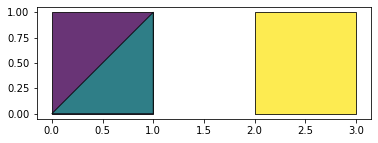

In [4]:
plt = gdf.plot(cmap='viridis',edgecolor='black',alpha=0.8)

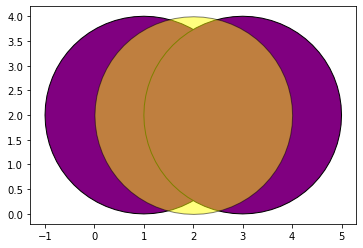

In [19]:
p1 = Point((1,2)).buffer(2)
p2 = Point((2,2)).buffer(2)
p3 = Point((3,2)).buffer(2)
df_1 = pandas.DataFrame({'id': [11,33]})
df_2 = pandas.DataFrame({'b' : [22]})
gdf_1 = geopandas.GeoDataFrame(df_1, geometry = [p1,p3])
gdf_2 = geopandas.GeoDataFrame(df_2, geometry = [p2])
gdf_1['area'] = gdf_1.geometry.apply(lambda x: x.area)
gdf_2['area'] = gdf_2.geometry.apply(lambda x: x.area)

ax = gdf_1.plot(color='purple',edgecolor='k')
gdf_2.plot(ax=ax,color='yellow',edgecolor='k',alpha=0.5)

In [21]:
overlay = geopandas.overlay(gdf_1,gdf_2)

total_gdf = geopandas.GeoDataFrame(pandas.concat([gdf_1,gdf_2,overlay],ignore_index=True))
display(total_gdf)

c:\Users\jackm\Documents\GitHub\jackmckew.dev\content\2020\intro-to-geopandas\.env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,area,area_1,area_2,b,geometry,id
0,12.546194,NaN,NaN,NaN,"POLYGON ((3.00000 2.00000, 2.99037 1.80397, 2....",11.0
1,12.546194,NaN,NaN,NaN,"POLYGON ((5.00000 2.00000, 4.99037 1.80397, 4....",33.0
2,12.546194,NaN,NaN,22.0,"POLYGON ((4.00000 2.00000, 3.99037 1.80397, 3....",NaN
3,NaN,12.546194,12.546194,22.0,"POLYGON ((3.00000 2.00000, 2.99037 1.80397, 2....",11.0
4,NaN,12.546194,12.546194,22.0,"POLYGON ((2.50000 0.06594, 2.41943 0.08612, 2....",33.0


In [22]:
total_gdf['area'] = total_gdf.geometry.apply(lambda x: x.area)
display(total_gdf)

,area,area_1,area_2,b,geometry,id
0,12.546194,NaN,NaN,NaN,"POLYGON ((3.00000 2.00000, 2.99037 1.80397, 2....",11.0
1,12.546194,NaN,NaN,NaN,"POLYGON ((5.00000 2.00000, 4.99037 1.80397, 4....",33.0
2,12.546194,NaN,NaN,22.0,"POLYGON ((4.00000 2.00000, 3.99037 1.80397, 3....",NaN
3,8.591554,12.546194,12.546194,22.0,"POLYGON ((3.00000 2.00000, 2.99037 1.80397, 2....",11.0
4,8.591554,12.546194,12.546194,22.0,"POLYGON ((2.50000 0.06594, 2.41943 0.08612, 2....",33.0


In [25]:
total_gdf['Total'] = total_gdf.groupby(['id'])['area'].transform('sum')
new_gdf = total_gdf.drop_duplicates(subset=['id'])
new_gdf.dropna(subset=['id'],inplace=True)
display(new_gdf)

c:\Users\jackm\Documents\GitHub\jackmckew.dev\content\2020\intro-to-geopandas\.env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,area,area_1,area_2,b,geometry,id,Total
0,12.546194,NaN,NaN,NaN,"POLYGON ((3.00000 2.00000, 2.99037 1.80397, 2....",11.0,21.137748
1,12.546194,NaN,NaN,NaN,"POLYGON ((5.00000 2.00000, 4.99037 1.80397, 4....",33.0,21.137748


In [11]:
total_gdf['Total'] = total_gdf.groupby(['a'])['area'].transform('sum')
display(total_gdf)

,a,b,geometry,area,Total
0,11.0,NaN,"POLYGON ((3.00000 2.00000, 2.99037 1.80397, 2....",12.546194,21.137748
1,33.0,NaN,"POLYGON ((5.00000 2.00000, 4.99037 1.80397, 4....",12.546194,21.137748
2,NaN,22.0,"POLYGON ((4.00000 2.00000, 3.99037 1.80397, 3....",12.546194,NaN
3,11.0,22.0,"POLYGON ((3.00000 2.00000, 2.99037 1.80397, 2....",8.591554,21.137748
4,33.0,22.0,"POLYGON ((2.50000 0.06594, 2.41943 0.08612, 2....",8.591554,21.137748
